In [1]:
pip install -U scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd

users_df = pd.read_csv('users.csv')
likes_df = pd.read_csv('likes.csv')
users_likes_df = pd.read_csv('users-likes.csv')

filtered_users_likes_df = users_likes_df[users_likes_df['userid'].isin(users_df['userid'])]

merged_df = filtered_users_likes_df.merge(likes_df, left_on='likeid', right_on='likeid')

final_df = merged_df.merge(users_df, left_on='userid', right_on='userid')

final_df.to_csv('final.csv', index=False)

In [4]:
final_df = pd.read_csv('final.csv')

num_rows = final_df.shape[0]

print(f'The final dataset contains {num_rows} rows.')

The final dataset contains 10612326 rows.


In [5]:
final_df.dropna(inplace=True)

num_rows = final_df.shape[0]

print(f'The final dataset contains {num_rows} rows.')

The final dataset contains 2571573 rows.


In [6]:
na_values = final_df.isna().sum()

print(na_values)

any_na = final_df.isna().any().any()
print(f'Are there any NA values left in the dataset? {any_na}')

userid       0
likeid       0
name         0
gender       0
age          0
political    0
ope          0
con          0
ext          0
agr          0
neu          0
dtype: int64
Are there any NA values left in the dataset? False


In [7]:
print("First few rows for a sanity check:")
print(final_df.head())
print("\nLast few rows for a sanity check:")
print(final_df.tail())

duplicate_rows = final_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

print("\nDescriptive statistics for numerical columns:")
print(final_df.describe())

print("\nValue counts for categorical columns:")
for col in final_df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(final_df[col].value_counts())

print("\nData types of each column:")
print(final_df.dtypes)

First few rows for a sanity check:
                                userid                            likeid  \
7774  ce110562b3e2f7e5cad3775b32d9caa5  b65f46d64c688fe98bdbcf93a76a71fc   
7775  ce110562b3e2f7e5cad3775b32d9caa5  295533f33bf160e76d7e95efadfe196c   
7776  ce110562b3e2f7e5cad3775b32d9caa5  a4f3b9c60196cb0920b2868d057c7961   
7777  ce110562b3e2f7e5cad3775b32d9caa5  1c88edef6a3d9b9fba1381f3db085dc9   
7778  ce110562b3e2f7e5cad3775b32d9caa5  e327fc881114e13a28e7513f6b85c4b1   

                                              name  gender  age  political  \
7774  Yo también me rei de la caída de otro jejeje       1   27        0.0   
7775                                       Titanic       1   27        0.0   
7776                                  Skinny Jeans       1   27        0.0   
7777                                        iTunes       1   27        0.0   
7778                         Official Grease Movie       1   27        0.0   

       ope   con   ext   agr   neu  
77

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder(sparse=True) 
likes_matrix = encoder.fit_transform(final_df[['likeid']])

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42) 
likes_matrix_reduced = svd.fit_transform(likes_matrix)


C:\Users\Rmukk\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
personality_scores_min_max = final_df[['ope', 'con', 'ext', 'agr', 'neu']].agg(['min', 'max'])
print(personality_scores_min_max)

anomalies = final_df.isnull().sum()
print("Anomalies in each column after merging:")
print(anomalies)

unique_users = final_df['userid'].nunique()
unique_likes = final_df['likeid'].nunique()
print(f"Unique users: {unique_users}, Unique likes: {unique_likes}")


numerical_stats = final_df.describe()
print(numerical_stats)

print(final_df.dtypes)

duplicate_ids = final_df['userid'].duplicated().sum()
print(f"Duplicate user IDs found: {duplicate_ids}")

duplicate_likes_per_user = final_df.duplicated(subset=['userid', 'likeid']).sum()
print(f"Duplicate likes per user found: {duplicate_likes_per_user}")

logical_inconsistencies = (final_df['age'] < 0) | (final_df['ope'] < -5.49) | (final_df['ope'] > 1.90)
print(f"Logical inconsistencies found: {logical_inconsistencies.sum()}")

      ope   con   ext   agr   neu
min -5.49 -3.67 -3.08 -4.26 -2.13
max  1.90  2.24  1.92  2.32  2.85
Anomalies in each column after merging:
userid       0
likeid       0
name         0
gender       0
age          0
political    0
ope          0
con          0
ext          0
agr          0
neu          0
dtype: int64
Unique users: 27806, Unique likes: 587299
             gender           age     political           ope           con  \
count  2.571573e+06  2.571573e+06  2.571573e+06  2.571573e+06  2.571573e+06   
mean   5.844462e-01  2.837863e+01  3.019117e-01  2.605480e-01 -8.405119e-02   
std    4.928173e-01  7.800753e+00  4.590873e-01  1.002545e+00  1.014671e+00   
min    0.000000e+00  1.800000e+01  0.000000e+00 -5.490000e+00 -3.670000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00 -4.100000e-01 -7.900000e-01   
50%    1.000000e+00  2.600000e+01  0.000000e+00  4.200000e-01 -5.000000e-02   
75%    1.000000e+00  3.000000e+01  1.000000e+00  1.070000e+00  6.200000e-01   
max   

1    1502946
0    1068627
Name: gender, dtype: int64


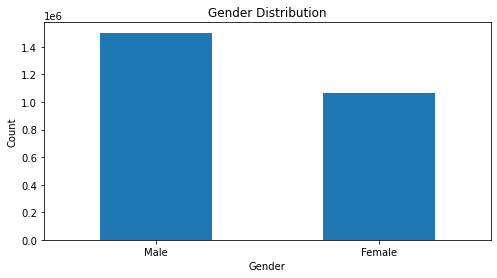

In [10]:
import matplotlib.pyplot as plt

gender_counts = final_df['gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(8, 4))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

0.0    1795185
1.0     776388
Name: political, dtype: int64


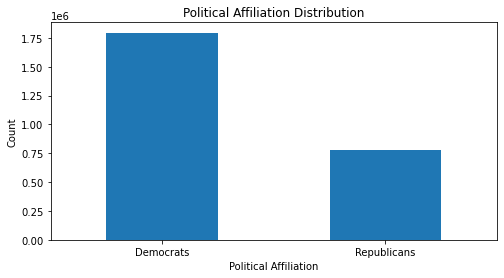

In [11]:
political_counts = final_df['political'].value_counts()
print(political_counts)

plt.figure(figsize=(8, 4))
political_counts.plot(kind='bar')
plt.title('Political Affiliation Distribution')
plt.xlabel('Political Affiliation')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Democrats', 'Republicans'], rotation=0)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

ocean_features = final_df[['ope', 'con', 'ext', 'agr', 'neu']].values

X = np.hstack((likes_matrix_reduced, ocean_features))
y = final_df[['age', 'gender', 'political']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)


In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

y_gender = y_train.iloc[:, 1] 
X_train_balanced, y_gender_balanced = smote.fit_resample(X_train, y_gender)

In [14]:
y_political = y_train.iloc[:, 2]
X_train_political_balanced, y_political_balanced = smote.fit_resample(X_train, y_political)

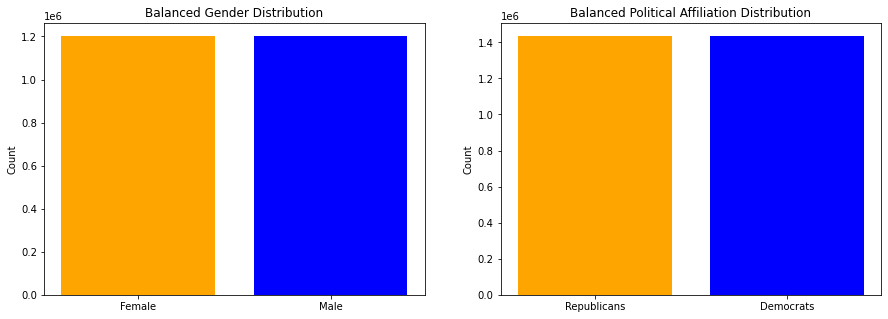

In [15]:
import matplotlib.pyplot as plt

gender_counts_balanced = pd.Series(y_gender_balanced).value_counts()

political_counts_balanced = pd.Series(y_political_balanced).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(gender_counts_balanced.index, gender_counts_balanced.values, color=['blue', 'orange'])
axes[0].set_title('Balanced Gender Distribution')
axes[0].set_xticks(gender_counts_balanced.index)
axes[0].set_xticklabels(['Male', 'Female'])
axes[0].set_ylabel('Count')

axes[1].bar(political_counts_balanced.index, political_counts_balanced.values, color=['blue', 'orange'])
axes[1].set_title('Balanced Political Affiliation Distribution')
axes[1].set_xticks(political_counts_balanced.index)
axes[1].set_xticklabels(['Democrats', 'Republicans'])
axes[1].set_ylabel('Count')

plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

X_combined = np.hstack((likes_matrix_reduced, ocean_features))

X_train, X_test, y_train, y_test = train_test_split(X_combined, final_df[['gender', 'political']], test_size=0.2, random_state=63)

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=51))
])

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train['gender'])
print(f"Best parameters for gender: {grid_search.best_params_}")
gender_predictions_svm = grid_search.predict(X_test)

grid_search.fit(X_train, y_train['political'])
print(f"Best parameters for political: {grid_search.best_params_}")
political_predictions_svm = grid_search.predict(X_test)


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_age_train, y_age_test = train_test_split(X_combined, y_age, test_size=0.2, random_state=61)

svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__kernel': ['linear', 'rbf'],
    'svr__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_age_train)
print(f"Best parameters for age: {grid_search.best_params_}")
age_predictions_svr = grid_search.predict(X_test)
